Applying k-means clustering to derive high, mid, and low value customers (based on RFM model)

In [27]:
import pandas as pd
import numpy as np
import pickle
import time
import matplotlib.pyplot as plt
import seaborn as sns
from get_user_split_data import get_user_split_data
from sklearn.cluster import KMeans
from scipy import spatial

#settings
pd.set_option('display.max_colwidth', -1)
np.set_printoptions(threshold=np.inf)
pd.options.display.max_columns = None
pd.options.display.max_rows = None
from IPython.core.interactiveshell import InteractiveShell  
InteractiveShell.ast_node_interactivity = "all"
# init_notebook_mode(connected=True)
%config InlineBackend.figure_format = 'svg'
%matplotlib inline 
seed = 123

In [2]:
with open('../data/interim/master_df.pkl', 'rb') as read_file:
    df = pickle.load(read_file)  
with open('../data/processed/df_user_rfm.pkl', 'rb') as read_file:
    df_user = pickle.load(read_file)  

In [5]:
def get_user_split_data(df, test_size=.2, seed=seed):
    rs = np.random.RandomState(seed)
    total_users = df['customer_id'].unique() 
    test_users = rs.choice(total_users, 
                           size=int(total_users.shape[0] * test_size), 
                           replace=False)

    list_of_cust_in_train = df[~df['customer_id'].isin(test_users)]['customer_id'].tolist()
    list_of_cust_in_test = df[df['customer_id'].isin(test_users)]['customer_id'].tolist()
    return list_of_cust_in_train, list_of_cust_in_test

In [6]:
list_of_cust_in_train,list_of_cust_in_test = get_user_split_data(df)

In [8]:
df_user.head(3)

,customer_id,Recency,Frequency,payment_value
0,08c5351a6aca1c1589a38f244edeee9d,772,2,272.46
1,08c5351a6aca1c1589a38f244edeee9d,772,2,272.46
2,683c54fc24d40ee9f8a6fc179fd9856c,772,1,75.06


In [11]:
df_user['customer_id'].nunique() == df['customer_id'].nunique()
len(df_user['customer_id'])

True

119151

In [12]:
df_recency = df_user[['customer_id', 'Recency']]
df_recency.head(3)
df_recency_train = df_recency[df_recency['customer_id'].isin(list_of_cust_in_train)]
df_recency_test = df_recency[df_recency['customer_id'].isin(list_of_cust_in_test)]
df_recency_train.head(1)
len(list_of_cust_in_train) == len(df_recency_train)
len(list_of_cust_in_test) == len(df_recency_test)

,customer_id,Recency
0,08c5351a6aca1c1589a38f244edeee9d,772
1,08c5351a6aca1c1589a38f244edeee9d,772
2,683c54fc24d40ee9f8a6fc179fd9856c,772


,customer_id,Recency
0,08c5351a6aca1c1589a38f244edeee9d,772


True

True

In [13]:
df_frequency = df_user[['customer_id', 'Frequency']]
df_frequency_train = df_frequency[df_frequency['customer_id'].isin(list_of_cust_in_train)]
df_frequency_test = df_frequency[df_frequency['customer_id'].isin(list_of_cust_in_test)]
df_frequency_train.head(1)
len(list_of_cust_in_train) == len(df_frequency_train)
len(list_of_cust_in_test) == len(df_frequency_test)

,customer_id,Frequency
0,08c5351a6aca1c1589a38f244edeee9d,2


True

True

In [14]:
df_revenue = df_user[['customer_id', 'payment_value']]
df_revenue_train = df_revenue[df_revenue['customer_id'].isin(list_of_cust_in_train)]
df_revenue_test = df_revenue[df_revenue['customer_id'].isin(list_of_cust_in_test)]
df_revenue_train.head(1)
len(list_of_cust_in_train) == len(df_revenue_train)
len(list_of_cust_in_test) == len(df_revenue_test)

,customer_id,payment_value
0,08c5351a6aca1c1589a38f244edeee9d,272.46


True

True

/Users/admin/anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/admin/anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/admin/anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

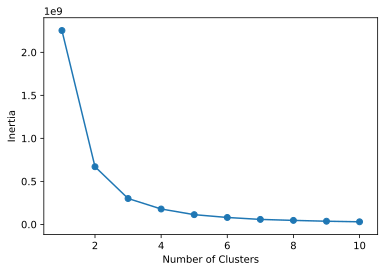

In [17]:
inertia = []
list_num_clusters = list(range(1,11))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters, max_iter=1000).fit(df_recency_train[['Recency']])
    inertia.append(km.inertia_)
    
plt.plot(list_num_clusters,inertia)
plt.scatter(list_num_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');

While it seemed like 2 is the optimal number of clusters, but having too few clusters may be oversimplifying things, so let's go with 4

In [22]:
recency_cluster_4 = KMeans(n_clusters=4, random_state=0).fit(df_recency_train[['Recency']])

In [23]:
df_recency_train['Recency_cluster'] = recency_cluster_4.labels_
df_recency_train.head(2)
df_recency_train['Recency_cluster'].unique()

/Users/admin/anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,customer_id,Recency,Recency_cluster
0,08c5351a6aca1c1589a38f244edeee9d,772,0
1,08c5351a6aca1c1589a38f244edeee9d,772,0


array([0, 3, 2, 1])

In [24]:
recency_centroids_df = pd.DataFrame(columns = df_recency_train[['Recency']].columns, data = recency_cluster_4.cluster_centers_)
recency_centroids_df

,Recency
0,536.135096
1,111.385895
2,232.581072
3,365.193533


In [35]:
test_recency_cluster = []
for i in range(df_recency_test.shape[0]):
    recency_hold_dist = []
    for j in range(recency_centroids_df.shape[0]):
        recency_hold_dist.append(spatial.distance.cosine(df_recency_test['Recency'].iloc[i], recency_centroids_df.iloc[j]))
    
    test_recency_cluster.append(recency_hold_dist.index(min(recency_hold_dist)))

df_recency_test['Recency_cluster'] = test_recency_cluster
df_recency_test.head(2)
len(df_recency_test)

/Users/admin/anaconda3/envs/metis/lib/python3.7/site-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/Users/admin/anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,customer_id,Recency,Recency_cluster
3,622e13439d6b5a0b486c435618b2679e,764,3
11,6f989332712d3222b6571b1cf5b835ce,743,0


23655

In [36]:
len(df_recency_train) + len(df_recency_test) == len(df_recency)

True

In [38]:
df_recency_train.head(1)
df_recency_test.head(1)

,customer_id,Recency,Recency_cluster
0,08c5351a6aca1c1589a38f244edeee9d,772,0


,customer_id,Recency,Recency_cluster
3,622e13439d6b5a0b486c435618b2679e,764,3


In [40]:
df_recency_cluster = pd.concat([df_recency_train, df_recency_test], axis = 0)
df_recency_cluster.head(3)
len(df_recency_cluster) == len(df_recency)
set(list(df_recency_cluster['customer_id'])) == set(list(df_recency['customer_id']))

,customer_id,Recency,Recency_cluster
0,08c5351a6aca1c1589a38f244edeee9d,772,0
1,08c5351a6aca1c1589a38f244edeee9d,772,0
2,683c54fc24d40ee9f8a6fc179fd9856c,772,0


True

True

In [44]:
df_recency_cluster.groupby('Recency_cluster')['Recency'].describe()


,count,mean,std,min,25%,50%,75%,max
Recency_cluster,,,,,,,,
0,31970.0,421.436659,168.534048,0.0,285.0,477.0,545.0,772.0
1,25373.0,114.265794,45.562408,0.0,78.0,112.0,147.0,489.0
2,31125.0,239.963084,65.958461,22.0,202.0,234.0,267.0,742.0
3,30683.0,354.926083,75.603472,41.0,322.0,352.0,402.0,764.0


From the above table the recency clusters have different characteristics. The customers in Cluster 1 are very recent compared to the rest, with cluster 0 having the most inactive customers.

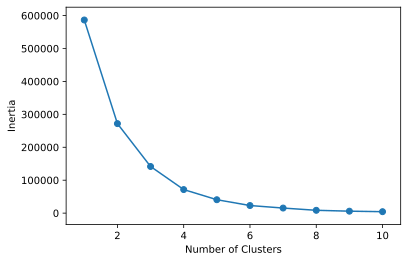

In [45]:
inertia = []
list_num_clusters = list(range(1,11))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters, max_iter=1000).fit(df_frequency_train[['Frequency']])
    inertia.append(km.inertia_)
    
plt.plot(list_num_clusters,inertia)
plt.scatter(list_num_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');

In [47]:
frequency_cluster_5 = KMeans(n_clusters=5, random_state=0).fit(df_frequency_train[['Frequency']])
df_frequency_train['frequency_cluster'] = frequency_cluster_5.labels_

frequency_centroids_df = pd.DataFrame(columns = df_frequency_train[['Frequency']].columns, data = frequency_cluster_5.cluster_centers_)
frequency_centroids_df

test_frequency_cluster = []
for i in range(df_frequency_test.shape[0]):
    frequency_hold_dist = []
    for j in range(frequency_centroids_df.shape[0]):
        frequency_hold_dist.append(spatial.distance.cosine(df_frequency_test['Frequency'].iloc[i], frequency_centroids_df.iloc[j]))
    
    test_frequency_cluster.append(frequency_hold_dist.index(min(frequency_hold_dist)))

df_frequency_test['frequency_cluster'] = test_frequency_cluster

len(df_frequency_train) + len(df_frequency_test) == len(df_frequency)
df_frequency_cluster = pd.concat([df_frequency_train, df_frequency_test], axis = 0)

df_frequency_cluster.head(3)

len(df_frequency_cluster) == len(df_frequency)
set(list(df_frequency_cluster['customer_id'])) == set(list(df_frequency['customer_id']))

/Users/admin/anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Frequency
0,4.088033
1,1.186100
2,24.782456
3,63.000000
4,10.537299


/Users/admin/anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


True

,customer_id,Frequency,frequency_cluster
0,08c5351a6aca1c1589a38f244edeee9d,2,1
1,08c5351a6aca1c1589a38f244edeee9d,2,1
2,683c54fc24d40ee9f8a6fc179fd9856c,1,1


True

True

In [49]:
df_frequency_cluster.groupby('frequency_cluster')['Frequency'].describe()


,count,mean,std,min,25%,50%,75%,max
frequency_cluster,,,,,,,,
0,32447.0,2.262736,2.064120,1.0,1.0,1.0,3.0,26.0
1,85192.0,1.199948,0.468115,1.0,1.0,1.0,1.0,10.0
2,285.0,24.782456,5.787466,20.0,21.0,22.0,24.0,38.0
3,63.0,63.000000,0.000000,63.0,63.0,63.0,63.0,63.0
4,1164.0,10.470790,2.398768,7.0,8.0,10.0,12.0,16.0


In [55]:
df_frequency_train_copy = df_frequency_train.copy()
frequency_cluster_4 = KMeans(n_clusters=4, random_state=0).fit(df_frequency_train_copy[['Frequency']])
df_frequency_train_copy['frequency_cluster'] = frequency_cluster_4.labels_

frequency_centroids_df1 = pd.DataFrame(columns = df_frequency_train_copy[['Frequency']].columns, data = frequency_cluster_4.cluster_centers_)
frequency_centroids_df1

,Frequency
0,1.264807
1,21.871287
2,5.644285
3,63.000000


In [54]:
df_frequency_train_copy = df_frequency_train.copy()
frequency_cluster_4 = KMeans(n_clusters=4, random_state=0).fit(df_frequency_train_copy[['Frequency']])
df_frequency_train_copy['frequency_cluster'] = frequency_cluster_4.labels_

frequency_centroids_df1 = pd.DataFrame(columns = df_frequency_train_copy[['Frequency']].columns, data = frequency_cluster_4.cluster_centers_)
frequency_centroids_df1

test_frequency_cluster1 = []
df_frequency_test1 = df_frequency_test.copy()
for i in range(df_frequency_test1.shape[0]):
    frequency_hold_dist = []
    for j in range(frequency_centroids_df1.shape[0]):
        frequency_hold_dist.append(spatial.distance.cosine(df_frequency_test1['Frequency'].iloc[i], frequency_centroids_df1.iloc[j]))
    
    test_frequency_cluster1.append(frequency_hold_dist.index(min(frequency_hold_dist)))

df_frequency_test1['frequency_cluster'] = test_frequency_cluster1

len(df_frequency_train_copy) + len(df_frequency_test1) == len(df_frequency)
df_frequency_cluster1 = pd.concat([df_frequency_train_copy, df_frequency_test1], axis = 0)

df_frequency_cluster1.head(3)

len(df_frequency_cluster1) == len(df_frequency)
set(list(df_frequency_cluster1['customer_id'])) == set(list(df_frequency['customer_id']))
df_frequency_cluster1.groupby('frequency_cluster')['Frequency'].describe()


True

,customer_id,Frequency,frequency_cluster
0,08c5351a6aca1c1589a38f244edeee9d,2,0
1,08c5351a6aca1c1589a38f244edeee9d,2,0
2,683c54fc24d40ee9f8a6fc179fd9856c,1,0


True

True

,count,mean,std,min,25%,50%,75%,max
frequency_cluster,,,,,,,,
0,111150.0,1.295816,0.833348,1.0,1.0,1.0,1.0,26.0
1,531.0,19.033898,7.844646,7.0,14.0,20.0,24.0,38.0
2,7407.0,5.502768,2.635927,3.0,4.0,5.0,6.0,24.0
3,63.0,63.000000,0.000000,63.0,63.0,63.0,63.0,63.0


In [56]:
df_user.Frequency.value_counts()
# df.loc[df['']]

1     86486
2     19696
3     4674 
4     3332 
6     1686 
5     1245 
7     329  
8     328  
12    252  
10    170  
9     126  
11    121  
24    120  
15    90   
14    70   
63    63   
21    63   
20    60   
13    52   
22    44   
38    38   
16    32   
29    29   
26    26   
19    19   
Name: Frequency, dtype: int64

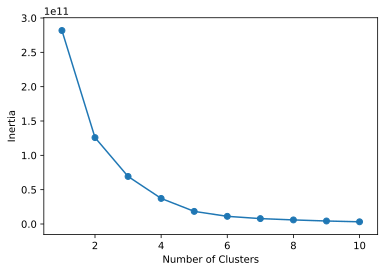

In [46]:
inertia = []
list_num_clusters = list(range(1,11))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters, max_iter=1000).fit(df_revenue_train[['payment_value']])
    inertia.append(km.inertia_)
    
plt.plot(list_num_clusters,inertia)
plt.scatter(list_num_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');

In [48]:
revenue_cluster_5 = KMeans(n_clusters=5, random_state=0).fit(df_revenue_train[['payment_value']])
df_revenue_train['revenue_cluster'] = revenue_cluster_5.labels_

revenue_centroids_df = pd.DataFrame(columns = df_revenue_train[['payment_value']].columns, data = revenue_cluster_5.cluster_centers_)
revenue_centroids_df

test_revenue_cluster = []
for i in range(df_revenue_test.shape[0]):
    revenue_hold_dist = []
    for j in range(revenue_centroids_df.shape[0]):
        revenue_hold_dist.append(spatial.distance.cosine(df_revenue_test['payment_value'].iloc[i], revenue_centroids_df.iloc[j]))
    
    test_revenue_cluster.append(revenue_hold_dist.index(min(revenue_hold_dist)))

df_revenue_test['revenue_cluster'] = test_revenue_cluster

len(df_revenue_train) + len(df_revenue_test) == len(df_revenue)
df_revenue_cluster = pd.concat([df_revenue_train, df_revenue_test], axis = 0)

df_revenue_cluster.head(3)

len(df_revenue_cluster) == len(df_revenue)
set(list(df_revenue_cluster['customer_id'])) == set(list(df_revenue['customer_id']))

/Users/admin/anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,payment_value
0,3894.489841
1,225.754673
2,41194.204286
3,16030.014236
4,109312.640000


/Users/admin/anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


True

,customer_id,payment_value,revenue_cluster
0,08c5351a6aca1c1589a38f244edeee9d,272.46,1
1,08c5351a6aca1c1589a38f244edeee9d,272.46,1
2,683c54fc24d40ee9f8a6fc179fd9856c,75.06,1


True

True

In [50]:
df_revenue_cluster.groupby('revenue_cluster')['payment_value'].describe()


,count,mean,std,min,25%,50%,75%,max
revenue_cluster,,,,,,,,
0,19944.0,655.656304,1470.108609,12.89,71.49,142.76,358.650,29099.52
1,94383.0,226.453178,295.256332,0.00,67.29,123.52,242.030,5527.44
2,928.0,2693.396864,9866.617518,17.87,69.90,136.40,295.200,45256.00
3,895.0,3827.601665,6842.463976,13.38,80.63,176.72,880.305,22346.60
4,3001.0,638.432439,5730.555961,18.37,70.89,131.61,270.720,109312.64


In [80]:
frames = [df_recency_cluster, df_frequency_cluster1, df_revenue_cluster]
df_user_rfm = pd.concat(frames, axis = 1)
len(df_user_rfm)

df_user_rfm = df_user_rfm[['customer_id', 'Recency', 'Recency_cluster', 'Frequency', 'frequency_cluster',
                          'payment_value', 'revenue_cluster']]
df_user_rfm.head(3)

119151

,customer_id,customer_id,customer_id,Recency,Recency_cluster,Frequency,frequency_cluster,payment_value,revenue_cluster
0,08c5351a6aca1c1589a38f244edeee9d,08c5351a6aca1c1589a38f244edeee9d,08c5351a6aca1c1589a38f244edeee9d,772,0,2,0,272.46,1
1,08c5351a6aca1c1589a38f244edeee9d,08c5351a6aca1c1589a38f244edeee9d,08c5351a6aca1c1589a38f244edeee9d,772,0,2,0,272.46,1
2,683c54fc24d40ee9f8a6fc179fd9856c,683c54fc24d40ee9f8a6fc179fd9856c,683c54fc24d40ee9f8a6fc179fd9856c,772,0,1,0,75.06,1


In [74]:
set(list(df_user_rfm1['customer_id']))==(set(list(df_user_rfm1['customer_id'])))

True

In [83]:
df_user_rfm['OverallScore'] = df_user_rfm['Recency_cluster'] + df_user_rfm['frequency_cluster'] + df_user_rfm['revenue_cluster']


In [84]:
df_user_rfm.head(2)

,customer_id,customer_id,customer_id,Recency,Recency_cluster,Frequency,frequency_cluster,payment_value,revenue_cluster,OverallScore
0,08c5351a6aca1c1589a38f244edeee9d,08c5351a6aca1c1589a38f244edeee9d,08c5351a6aca1c1589a38f244edeee9d,772,0,2,0,272.46,1,1
1,08c5351a6aca1c1589a38f244edeee9d,08c5351a6aca1c1589a38f244edeee9d,08c5351a6aca1c1589a38f244edeee9d,772,0,2,0,272.46,1,1


In [90]:
df_user_rfm = df_user_rfm.loc[:,~df_user_rfm.columns.duplicated()]
df_user_rfm.head(2)

,customer_id,Recency,Recency_cluster,Frequency,frequency_cluster,payment_value,revenue_cluster,OverallScore
0,08c5351a6aca1c1589a38f244edeee9d,772,0,2,0,272.46,1,1
1,08c5351a6aca1c1589a38f244edeee9d,772,0,2,0,272.46,1,1


In [91]:
df_user_rfm.groupby('OverallScore')['Recency','Frequency','payment_value'].mean()

,Recency,Frequency,payment_value
OverallScore,,,
0,291.053920,1.363331,290.421209
1,517.432942,1.322187,243.295138
2,139.821402,1.443316,265.066574
3,250.848438,1.551423,282.872982
4,347.537877,1.585273,308.445350
5,277.360268,5.909821,1680.232960
6,342.582104,4.387911,1388.567925
7,316.655678,8.592186,2653.949292
8,325.339286,7.464286,12411.080714


In [92]:
df_user_rfm.groupby('OverallScore')['customer_id'].count()

OverallScore
0    10701
1    16866
2    27380
3    31591
4    27365
5    2240 
6    2101 
7    819  
8    56   
9    32   
Name: customer_id, dtype: int64

In [94]:
df_user_rfm['Segment'] = 'Low-Value'
df_user_rfm.loc[df_user_rfm['OverallScore'].isin([4,6]),'Segment'] = 'Mid-Value' 
df_user_rfm.loc[df_user_rfm['OverallScore'].isin([5,7,8,9]),'Segment'] = 'High-Value' 
df_user_rfm['Segment'].value_counts()

/Users/admin/anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/admin/anaconda3/envs/metis/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Low-Value     86538
Mid-Value     29466
High-Value    3147 
Name: Segment, dtype: int64

In [105]:
# with open('../data/processed/df_user_rfm_score.pkl', 'wb') as to_write: 
#     pickle.dump(df_user_rfm, to_write)

<Figure size 1440x1080 with 0 Axes>

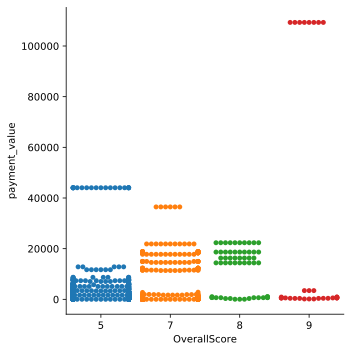

In [108]:
high_value_cust = df_user_rfm.loc[df_user_rfm['Segment']=='High-Value']
plt.figure(figsize=(20, 15))
ax = sns.catplot(x="OverallScore", y="payment_value", kind="swarm", data=high_value_cust)
plt.tight_layout()
plt.show();

In [109]:
high_value_cust_id = df_user_rfm.loc[df_user_rfm['Segment']=='High-Value', 'customer_id'].tolist()
high_value_cust = df.loc[df['customer_id'].isin(high_value_cust_id)]
len(high_value_cust)
high_value_cust.head(1)

3147

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_purchase_year,order_purchase_month,order_purchase_dayofweek,order_purchase_hour,month_year,year_month,hours_since_prior_order,repeated_customer,review_id,review_score
3,809a282bbd5dbcabb6f2f724fca862ec,1.0,credit_card,2.0,40.95,622e13439d6b5a0b486c435618b2679e,canceled,2016-09-13 15:24:19,2016-10-07 13:16:46,NaT,NaT,2016-09-30,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,009b0127b727ab0ba422f6d9604487c7,12244,sao jose dos campos,SP,2016,9,1,15,09-2016,2016-09,0,False,69ac6a27fde9855ebeaaecac0f78058b,1


In [112]:
high_value_cust_by_product_cat = high_value_cust.groupby('product_category_name_english')['order_id'].count().reset_index(name='num_product_cat_bought')
high_value_cust_by_product_cat.sort_values('num_product_cat_bought', ascending=False)

,product_category_name_english,num_product_cat_bought
6,bed_bath_table,439
30,furniture_decor,405
12,computers_accessories,275
39,housewares,230
34,health_beauty,191
33,garden_tools,184
45,office_furniture,129
52,sports_leisure,120
17,cool_stuff,108
47,perfumery,105


In [113]:
with open('../data/processed/high_value_cust.pkl', 'wb') as to_write: 
    pickle.dump(high_value_cust, to_write)